# Dose-Response Curve

In the later portions of drug development—the field of pharmacology—the sensitivity to a drug acting at a receptor of interest is evaluated. Pharmacology is the branch of medicine, biology and pharmaceutical sciences concerned with drug or medication action where a molecule exerts a biochemical or physiological effect on the cell, tissue, organ, or organism. 

In [ ]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used to find fit parameters

A series of experiments is conducted to create a dose-response curve, a plot of response to drug treatment vs. drug concentration which allows for the application of a non-linear regression model to produce a sigmoidal curve. The x-values are the concentrations (doses) of a drug used in the experiment. In pharmacology there are four different classes of drugs used in dose-response experiments: 

-	**Agonist** – Amplifies the response of the signal 
-	**Partial agonist** – Elicits a response, but not the maximum response. 
-	**Inverse agonist** – Produces an opposite response of the agonist. 
-	**Antagonist** – Inhibits the action of the agonist. 

We will create a simplified dose-response curve comparing the drug response of both an agonist and antagonist *(note, to be reminded of the inhibitory properties of an antagonist it may be used interchangeably with 'inhibitor')*. Nonlinear regression can aid in the determination of a drug’s potency, effective concentration ($EC_{50} $), best-fit values, and interpolate unknowns from the standard curve produced. 

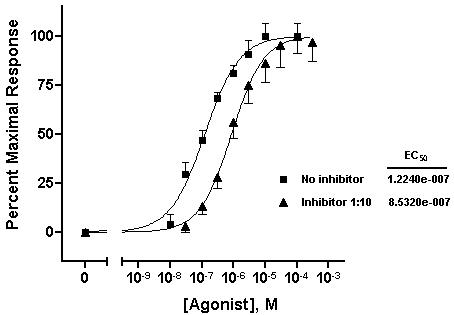

**Figure 1**: Example image of dose-response curve from literature PRISM 

## Understanding Dose-Response 

The y-values are the response measured in intervals. The response can decrease as drug concentration increases (downward sigmoidal) or the response can increase as the drug concentration increases (upward sigmoidal curve). This curve follows the following equation: 

$$ Y = \frac{a}{1+10^{(b-x)}} + c $$ 

Where:
- $Y = [A]_{bound}$ (ligand bound) 
- $x = log[A]$, $[A]$ is the free ligand concentration 
- $a = [A]_{max} – [A]_{min}$, $b = logEC_{50}$ and $c = [A]_{min}$.

As mentioned previously nonlinear regression can aid in determining a drug’s $EC_{50} $, which is the effective concentration for 50% response. 
 
## Assumptions

Before building our dose-response curve, we must identify the assumptions being made with plotting this data and our overall goal: 

-	The exact value of X is known, the Y values are the only unknown. 
-	All responses observed are independent of one another. 

The data used to produce our sigmoidal dose-response curve is representative data of a previous experiment done. Three replicate experiments were completed, evaluating each drug (agonist and agonist under the presence of an antagonist) at a receptor. The representative data was plotted with the literature and was found to produce the values below: 

$$inhibitor = (b = -6.069, EC_{50} = 8.5320e-7) $$
$$no inhibitor = (b = -6.912, EC_{50} = 1.2440e-7)$$

## The Goal
In an attempt to replicate the work of a the literature's **PRISM**, **PR**ediction **I**nformatics for **S**econdary **M**etabolomes. We will plot the points of the representative data and fit this data to a curve fit to compare our experimental values to the literature values. This will allows us to make observations about the effectiveness of our code as compared to a the computational tool, **PRISM**. 



## Plotting of Dose-Response Experiment Data

In [ ]:
# Read the data file. The result is a dataframe object, which is named df in this case.
nodf = pd.read_csv('averaged_no_inhibitor.txt', sep='\t') #sep = seperators
df = pd.read_csv('averaged_inhibitor.txt', sep='\t') 

#print first five rows of data with the header
print(nodf.head())
print(df.head())

The cells above contain each of the replicates for both drugs and the cell below contain the averaged response (y-value) at a given dose (x-value). 

In [ ]:
# give variable names to the columns of data
xdata = df['agonist (M)']
xfit = np.log10(xdata) #takes the log of the concentrations to make them 
ydata = df['inhibitor']

noxdata = nodf['agonist (M)']
noxfit = np.log10(noxdata) 
noydata = nodf['no inhibitor']

#define 0% and 100% as the smallest and the highest values of y axis
a = np.amax(ydata) #highest of inhibitor data
b = np.amin(ydata) #lowest of inhibitor data
noa = np.amax(noydata) #highest of no inhibitor data
nob = np.amin(noydata) #lowest of no inhibitor data
print (a)
print (b)
print (noa)
print(nob)

#now that you know the 0 and 100% modify axis to see entire sigmoidal curve 

#transform to percentage
ydata = ydata/a*100
noydata = noydata/noa*100

In [ ]:
# plot data
fig = plt.figure(figsize=(10,6))
plt.title("Sigmodial Dose Response")
plt.xlabel("log(concentration, M)")
plt.ylabel("relative response (%)")
plt.grid(which='both', axis='both')
plt.semilogx(xdata,ydata,'bo') #allows for log scale on only x axis of inhibitor data
plt.semilogx(noxdata,noydata,'ro') #allows for log scale on only x axis of no inhibitor data
#plt.ylim(nob-2,noa+2) #change these limits to see the entire graph
plt.show()

### Analysis of Plotted Points

The graph above displays the plotted values of the response of the agonist, with and without the presence of an inhibitor. The distinctive **sigmoidal “S-shape” response** can be seen with both plots. The blue points represent the response of the agonist while under the presence of the inhibitor, while the red points represent the response without. Although the purpose of this code is to calculate the same values as the commonly used computational program, **PRISM**, it is important to evaluate the data points produced to better our understanding of this method of analysis and its implication. The response with an inhibitor present is farther to the right of our graph, indicating a larger concentration of agonist is needed to elicit a response under the presence of an inhibitor. *This would be expected as an antagonist (inhibitor), inhibits the action of an agonist present.*


In [ ]:
# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,a,b,c: a/(1+10**(b-x)) + c 

# Find best fit parameters
guess=[100,1,1] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xfit, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(-10,-3.5,100) #log of concen. 
ymodel = model(xmodel,*params)


# plot data and model
plt.figure(figsize=(10,6))
plt.title("Sigmodial Dose Response")
plt.xlabel("log(concentration, M)")
plt.ylabel("relative response (%)")
plt.plot(xfit,ydata,'.b') # data points
plt.plot(xmodel,ymodel,'-b', label = "inhibitor present") #curve fit model
plt.legend()
plt.grid()
plt.show()

#results
residuals = model(xfit,*params) - ydata
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters for the inhibitor are: {:.3f}, {:.3f}, {:.3f}".format(*params))
#note the values produced in curve fit parameters are in alphabetic order: a, b c

In [ ]:
# Find best fit parameters
guess=[100,1,1] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, noxfit, noydata, p0=guess)

# calculate points for the model
noxmodel = np.linspace(-10,-4,100) #log of concen. 
noymodel = model(noxmodel,*params)


# plot data and model
plt.figure(figsize=(10,6))
plt.title("Sigmodial Dose Response")
plt.xlabel("log(concentration, M)")
plt.ylabel("relative response (%)")
plt.plot(noxfit,noydata,'.r') # data points
plt.plot(noxmodel,noymodel,'-r', label = "no inhibitor present") #curve fit model
plt.legend()
plt.grid()
plt.show()

#results
residuals = model(noxfit,*params) - noydata
print("The sum of the squares of the residuals = {:e}".format(np.sum(residuals**2)))
print("The curve fit parameters for no inhibitor are: {:.3f}, {:.3f}, {:.3f}".format(*params))
#note the values produced in curve fit parameters are in alphabetic order: a, b c

In [ ]:
#conversion of models to produce unique logarithmic x axis 
xconc = 10**xmodel
noxconc = 10**noxmodel 

# plot data and model
plt.figure(figsize=(10,6))
plt.title("Sigmodial Dose Response")
plt.xlabel("log(concentration, M)")
plt.ylabel("relative response (%)")
#note plt.semilogx() displays the logarithmic axis
plt.semilogx(xdata,ydata,'.b') # data
plt.semilogx(xconc,ymodel,'-b', label = "inhibitor present") #model
plt.semilogx(noxdata,noydata,'.r') # data
plt.semilogx(noxconc,noymodel,'-r', label = "no inhibitor present") #model
plt.legend()
plt.grid()
plt.show()

#results
residuals = model(xfit,*params) - ydata

In [ ]:
#note the b value of the curve fit parameter is equal to log(EC50) 
exp_b = 10**-6.107 
noexp_b = 10**-6.945
print("The EC50 under presence of inhibitor = ", exp_b)
print("The EC50 under presence of no inhibitor = ", noexp_b)

#Calculation of yields 
inyield_b = (abs(-6.107)/abs(-6.069))*100
inyield_EC50 = 7.8163e-7/8.5320e-7*100

noinyield_b = (abs(-6.912)/abs(-6.94))*100
noinyield_EC50 = 1.1350e-7/1.2440e-7*100

print("The accuracy% of b, with inihibitor = ", inyield_b)
print("The accuracy% of EC50, with inhibitor = ", inyield_EC50)

print("The accuracy% of b, with no inihibitor = ", noinyield_b)
print("The accuracy% of EC50, with no inhibitor = ", noinyield_EC50)

## Conclusion 

In an attempt to replicate the work of a work of literature's **PRISM** data, a computational program often used for the visualization of dose-response experiments, we plotted data points and applied curve fit parameters. 

The literature values for the $b$ parameter and the $EC_{50}$ of the repsonse elicited when under the presence of an inhibitor and without the presence are listed below respectively. 

$$inhibitor = (b = -6.069, EC_{50} = 8.5320e-7) $$
$$no inhibitor = (b = -6.912, EC_{50} = 1.2440e-7)$$

The experimental values calculated today for the $b$ parameter and the $EC_{50}$ of the repsonse elicited without the presence of an inhibitor are also listed below respectively.  

$$inhibitor = (b = -6.107,  EC_{50} = 7.8163e-7) $$
$$no  inhibitor = (b = -6.945,  EC_{50} = 1.1350e-7)$$




We were about 91% accurate with our $EC_{50}$ calculations for both the response of the agonist with inhibitor and without the inhibitor. The calculations for the $b$ parameter without the presence of the inhitor were 99.6% accurate while the experimental calculation for $b$ under the presence of the inhibitor were slightly over the desired calculation (100.62%). *Overall, the computational calculations used to produce the curve fit parameters were not 100% accurate however with further analysis and we can identify the inputs responsible for this discrepancy.*

## References
1. [Prism 3 -- analyzing dose-response data. GraphPad. (n.d.).](https://www.graphpad.com/support/faq/prism-3-analyzing-dose-response-data/)